In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

# **Get dataset**

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

# **Build BIlstm model**

In [4]:
bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# **Training**

In [5]:
bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
NUM_EPOCHS = 10
history = bilstm.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 59s 141ms/step - loss: 0.5469 - accuracy: 0.7250 - val_loss: 0.5161 - val_accuracy: 0.7525
Epoch 2/10
391/391 [==============================] - 56s 141ms/step - loss: 0.3722 - accuracy: 0.8490 - val_loss: 0.4118 - val_accuracy: 0.8282
Epoch 3/10
391/391 [==============================] - 55s 140ms/step - loss: 0.3430 - accuracy: 0.8638 - val_loss: 0.5794 - val_accuracy: 0.6539
Epoch 4/10
391/391 [==============================] - 55s 139ms/step - loss: 0.3384 - accuracy: 0.8645 - val_loss: 0.4750 - val_accuracy: 0.7947
Epoch 5/10
391/391 [==============================] - 55s 140ms/step - loss: 0.2400 - accuracy: 0.9096 - val_loss: 0.4402 - val_accuracy: 0.8214
Epoch 6/10
391/391 [==============================] - 55s 139ms/step - loss: 0.1972 - accuracy: 0.9296 - val_loss: 0.5020 - val_accuracy: 0.8099
Epoch 7/10
391/391 [==============================] - 55s 140ms/step - loss: 0.1620 - accuracy: 0.9401 - val_loss: 0.5867 - val_ac

# **Visualize loss and acc bilstm**

In [7]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

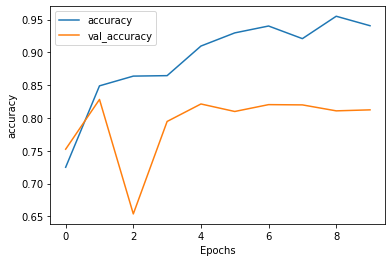

In [8]:
plot_graphs(history, 'accuracy')

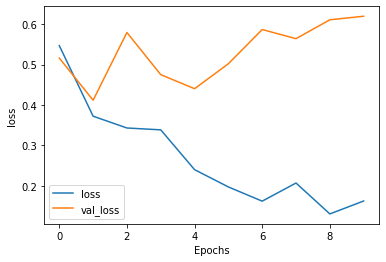

In [9]:
plot_graphs(history, 'loss')

# **Stack LSTM**

In [10]:
stack_bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
stack_bilstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS = 10
history = stack_bilstm.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 113s 276ms/step - loss: 0.5767 - accuracy: 0.6924 - val_loss: 0.4791 - val_accuracy: 0.7897
Epoch 2/10
391/391 [==============================] - 108s 277ms/step - loss: 0.4355 - accuracy: 0.8042 - val_loss: 0.7040 - val_accuracy: 0.6311
Epoch 3/10
391/391 [==============================] - 109s 278ms/step - loss: 0.4624 - accuracy: 0.7796 - val_loss: 0.4941 - val_accuracy: 0.7810
Epoch 4/10
391/391 [==============================] - 108s 274ms/step - loss: 0.5279 - accuracy: 0.7401 - val_loss: 0.6146 - val_accuracy: 0.6575
Epoch 5/10
391/391 [==============================] - 109s 279ms/step - loss: 0.4374 - accuracy: 0.8048 - val_loss: 0.4682 - val_accuracy: 0.7858
Epoch 6/10
391/391 [==============================] - 109s 279ms/step - loss: 0.4346 - accuracy: 0.8026 - val_loss: 0.5070 - val_accuracy: 0.7872
Epoch 7/10
391/391 [==============================] - 109s 279ms/step - loss: 0.2965 - accuracy: 0.8809 - val_loss: 0.4740 -

# **View Loss acc***

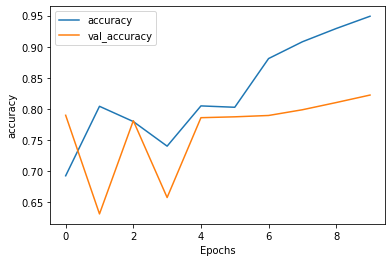

In [11]:
plot_graphs(history, 'accuracy')

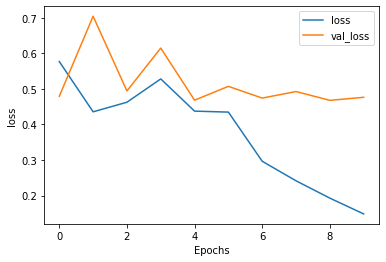

In [12]:
plot_graphs(history, 'loss')

# **GRU**

In [13]:
gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS = 10
history = gru.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 30s 40ms/step - loss: 0.4449 - accuracy: 0.7844 - val_loss: 0.3051 - val_accuracy: 0.8794
Epoch 2/10
391/391 [==============================] - 9s 21ms/step - loss: 0.2218 - accuracy: 0.9167 - val_loss: 0.2946 - val_accuracy: 0.8808
Epoch 3/10
391/391 [==============================] - 8s 18ms/step - loss: 0.1691 - accuracy: 0.9390 - val_loss: 0.3296 - val_accuracy: 0.8750
Epoch 4/10
391/391 [==============================] - 7s 18ms/step - loss: 0.1372 - accuracy: 0.9502 - val_loss: 0.3941 - val_accuracy: 0.8614
Epoch 5/10
391/391 [==============================] - 7s 17ms/step - loss: 0.1095 - accuracy: 0.9630 - val_loss: 0.4255 - val_accuracy: 0.8668
Epoch 6/10
391/391 [==============================] - 7s 17ms/step - loss: 0.0882 - accuracy: 0.9718 - val_loss: 0.4914 - val_accuracy: 0.8618
Epoch 7/10
391/391 [==============================] - 7s 16ms/step - loss: 0.0717 - accuracy: 0.9765 - val_loss: 0.5779 - val_accuracy: 0.858

# **View Loss**

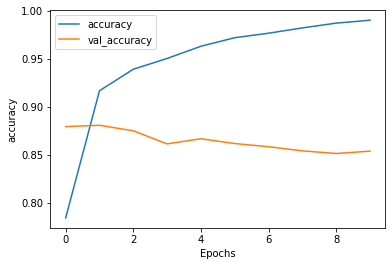

In [14]:
plot_graphs(history, 'accuracy')

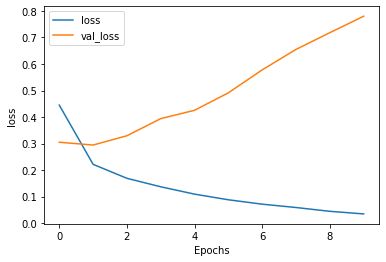

In [15]:
plot_graphs(history, 'loss')